# Multimodal RAG System for E-commerce

In [1]:
from multimodal_rag import MultimodalRAG
import os
from IPython.display import Image, display

In [2]:
# Initialize RAG
rag = MultimodalRAG(
    mongodb_uri="mongodb://localhost:58882/?directConnection=true",
    db_name="ecommerce_rag",
    collection_name="products"
)

In [3]:
# Load data
DATA_DIR = "data"
items = rag.load_data(DATA_DIR)
print(f"Loaded {len(items)} items from {DATA_DIR}")

Loaded 3 items from data


In [4]:
# Store embeddings
rag.store_embeddings(items)
print("Stored embeddings in MongoDB")

Stored embeddings in MongoDB



Results with image weight = 0.2 (text weight = 0.8)
----------------------------------------------------------------------
Product: Elegant Red Evening Dress
Description: Stunning red evening dress with a flowing silhouette. Perfect for formal occasions.
Overall similarity: 0.5972
Image similarity: 0.0271
Text similarity: 0.7397


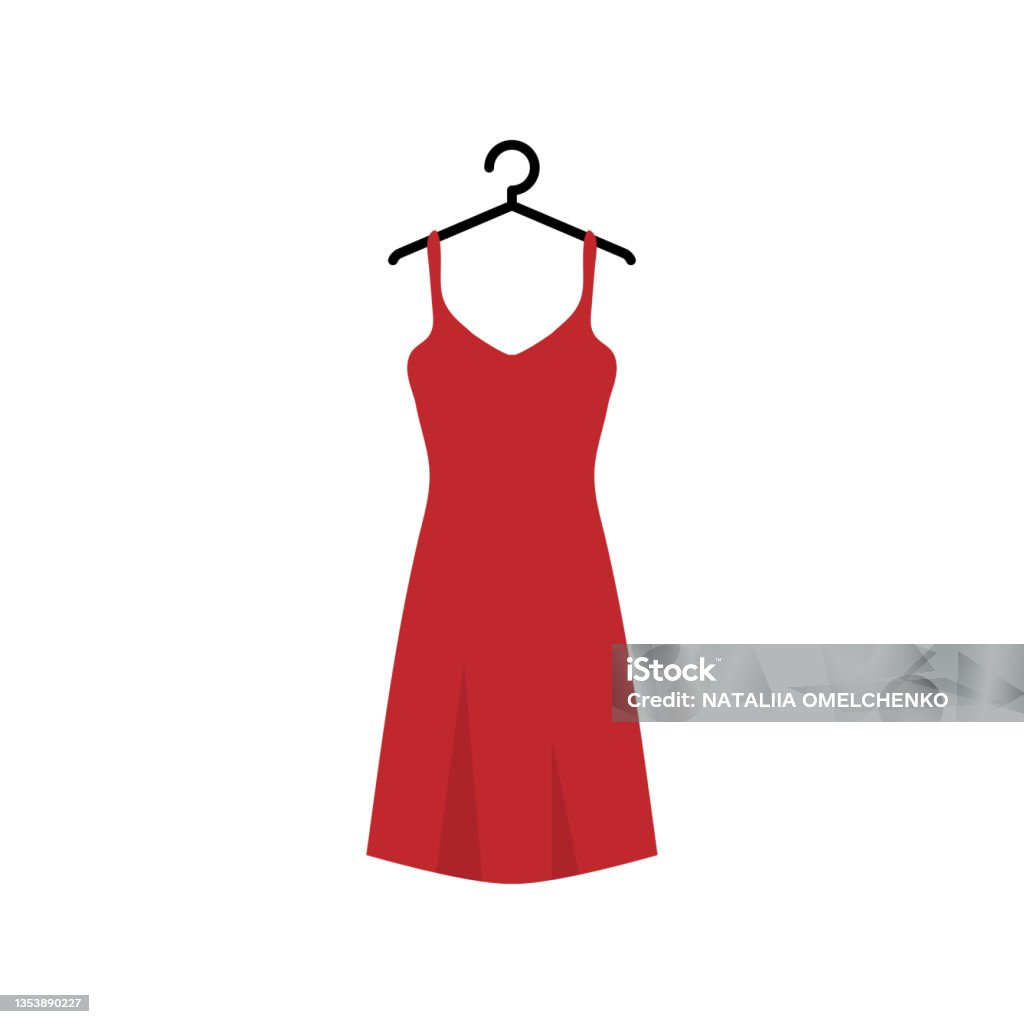


Results with image weight = 0.5 (text weight = 0.5)
----------------------------------------------------------------------
Product: Elegant Red Evening Dress
Description: Stunning red evening dress with a flowing silhouette. Perfect for formal occasions.
Overall similarity: 0.3834
Image similarity: 0.0271
Text similarity: 0.7397


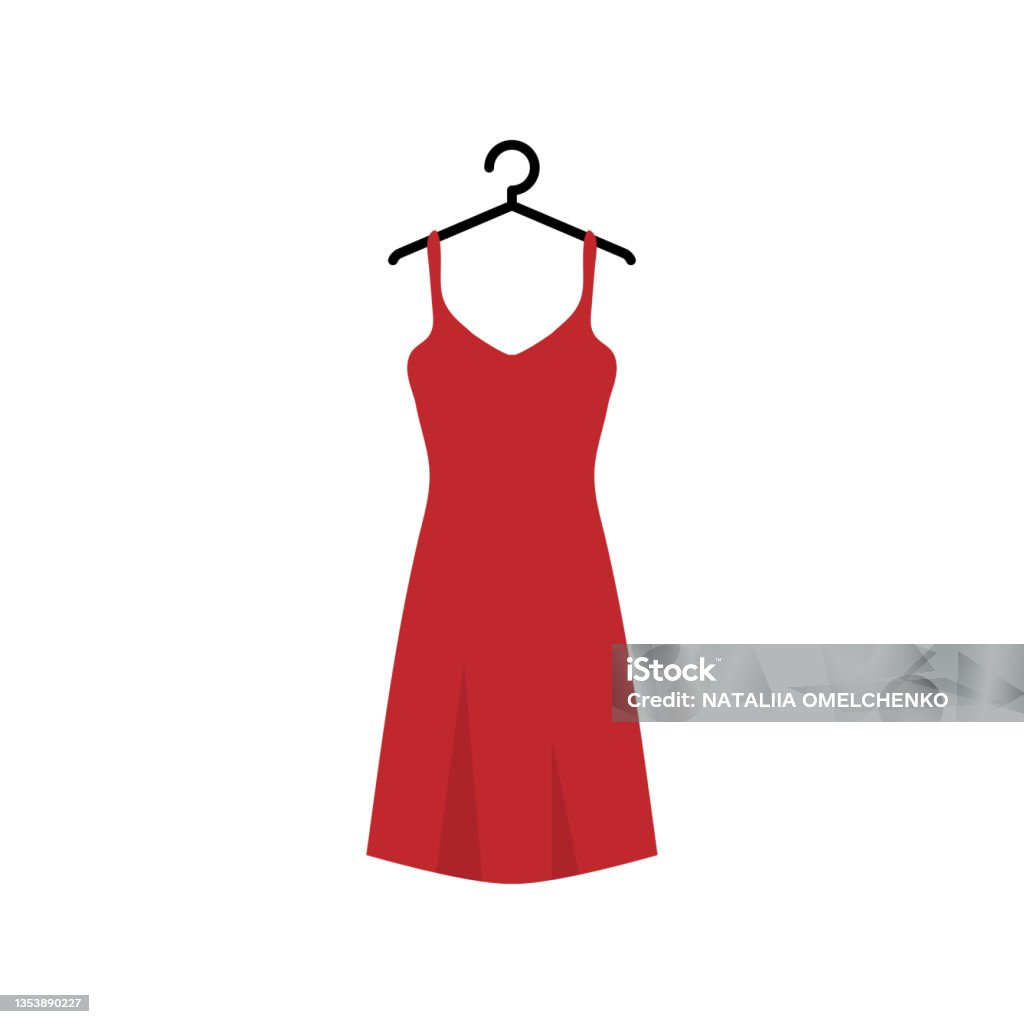


Results with image weight = 0.8 (text weight = 0.19999999999999996)
----------------------------------------------------------------------
Product: Elegant Red Evening Dress
Description: Stunning red evening dress with a flowing silhouette. Perfect for formal occasions.
Overall similarity: 0.1696
Image similarity: 0.0271
Text similarity: 0.7397


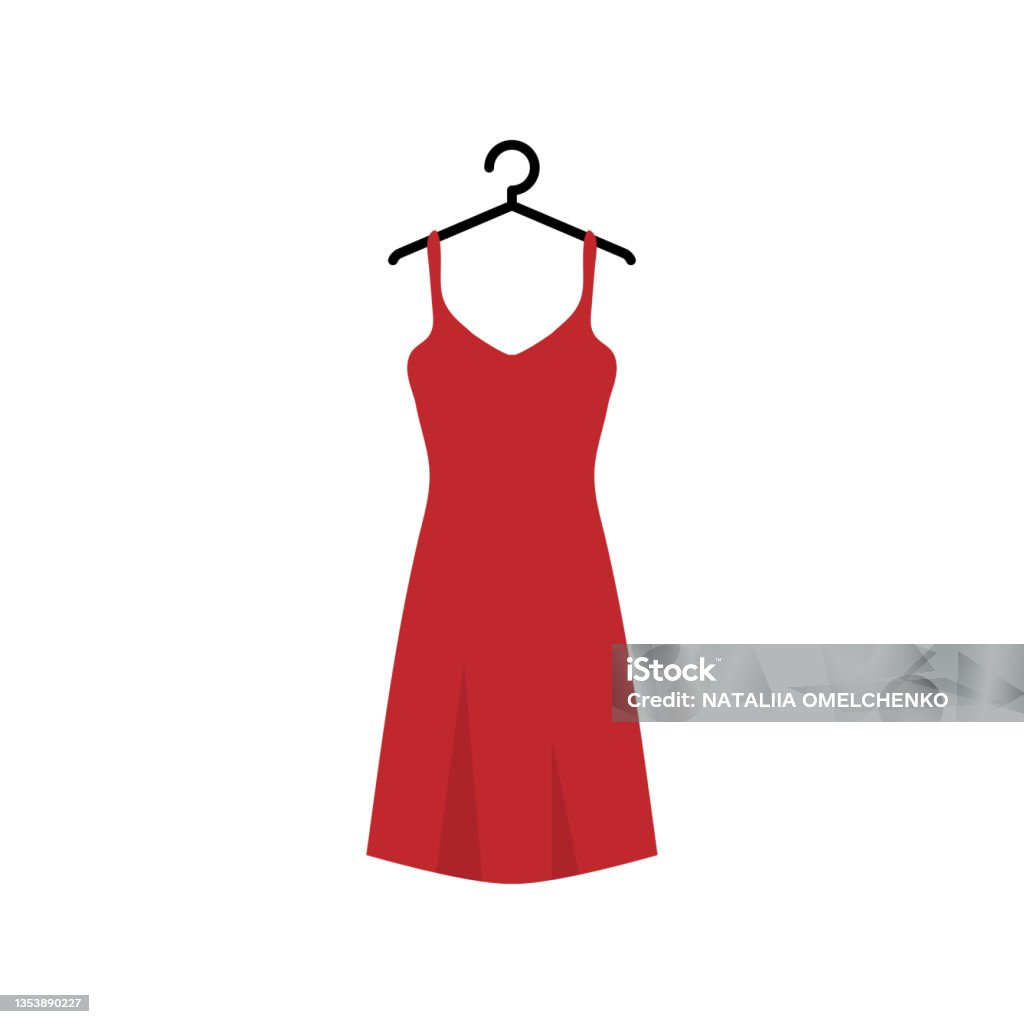

In [5]:
query = "a formal red dress"
weights = [0.2, 0.5, 0.8]

for weight_img in weights:
    print(f"\nResults with image weight = {weight_img} (text weight = {1 - weight_img})")
    print("-" * 70)
    
    results = rag.search(
        query_text=query,
        weight_img=weight_img,
        top_k=1
    )
    
    for result in results:
        print(f"Product: {result['description']['name']}")
        print(f"Description: {result['description']['description']}")
        print(f"Overall similarity: {result['similarity']:.4f}")
        print(f"Image similarity: {result['image_similarity']:.4f}")
        print(f"Text similarity: {result['text_similarity']:.4f}")
        display(Image(filename=result['image_path']))

Query: a comfortable cotton shirt in blue color
Weights: Image = 0.30, Text = 0.70

Result 1:
Product: Classic Blue Cotton T-Shirt
Description: Comfortable cotton t-shirt in a classic blue color. Perfect for casual wear.
Overall similarity: 0.5914
Image similarity: 0.0814
Text similarity: 0.8100


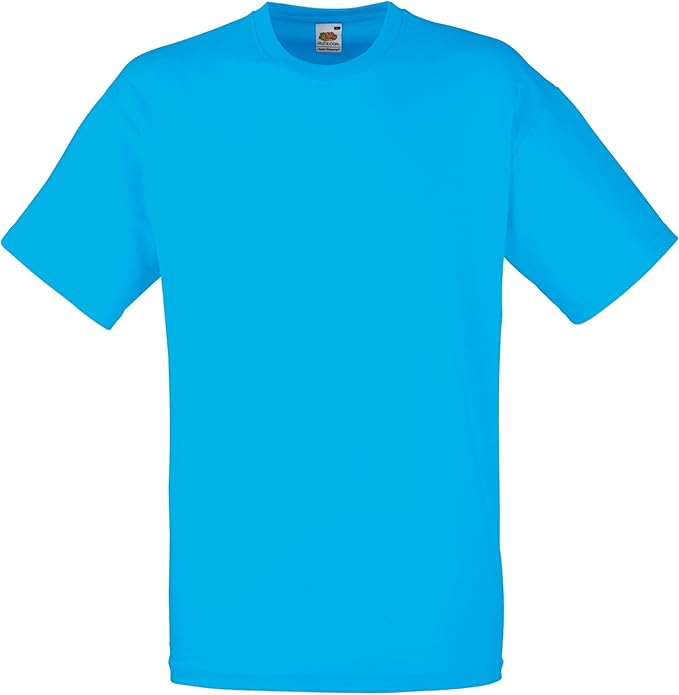


--------------------------------------------------

Result 2:
Product: Classic Black Denim Jeans
Description: Versatile black jeans with a slim fit design. Made from premium denim.
Overall similarity: 0.3944
Image similarity: 0.0828
Text similarity: 0.5279


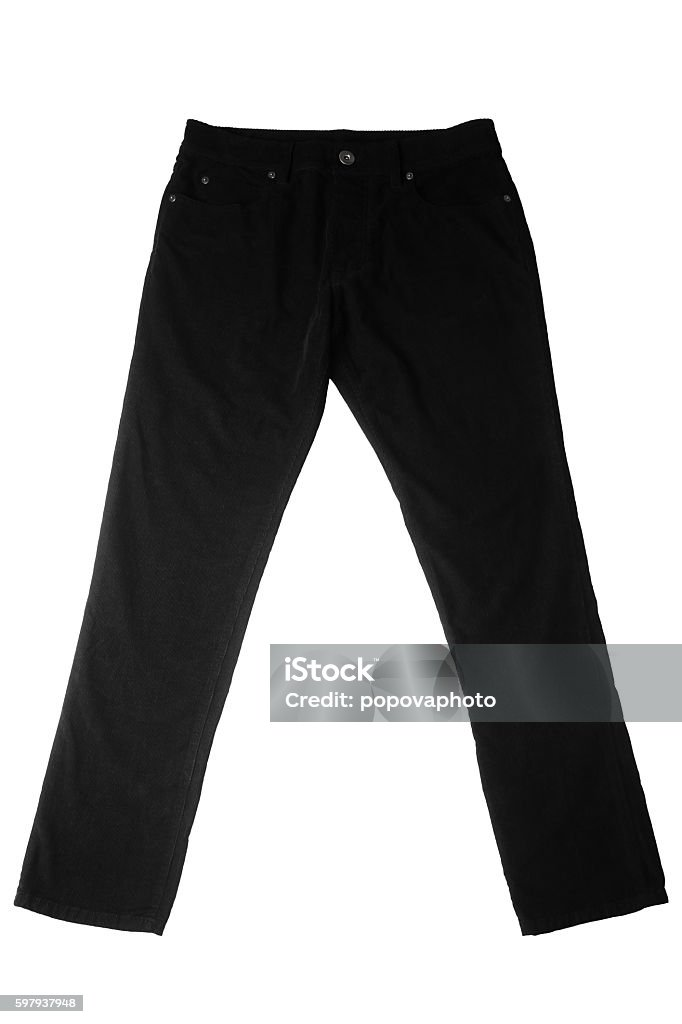


--------------------------------------------------

Result 3:
Product: Elegant Red Evening Dress
Description: Stunning red evening dress with a flowing silhouette. Perfect for formal occasions.
Overall similarity: 0.2789
Image similarity: 0.0464
Text similarity: 0.3785


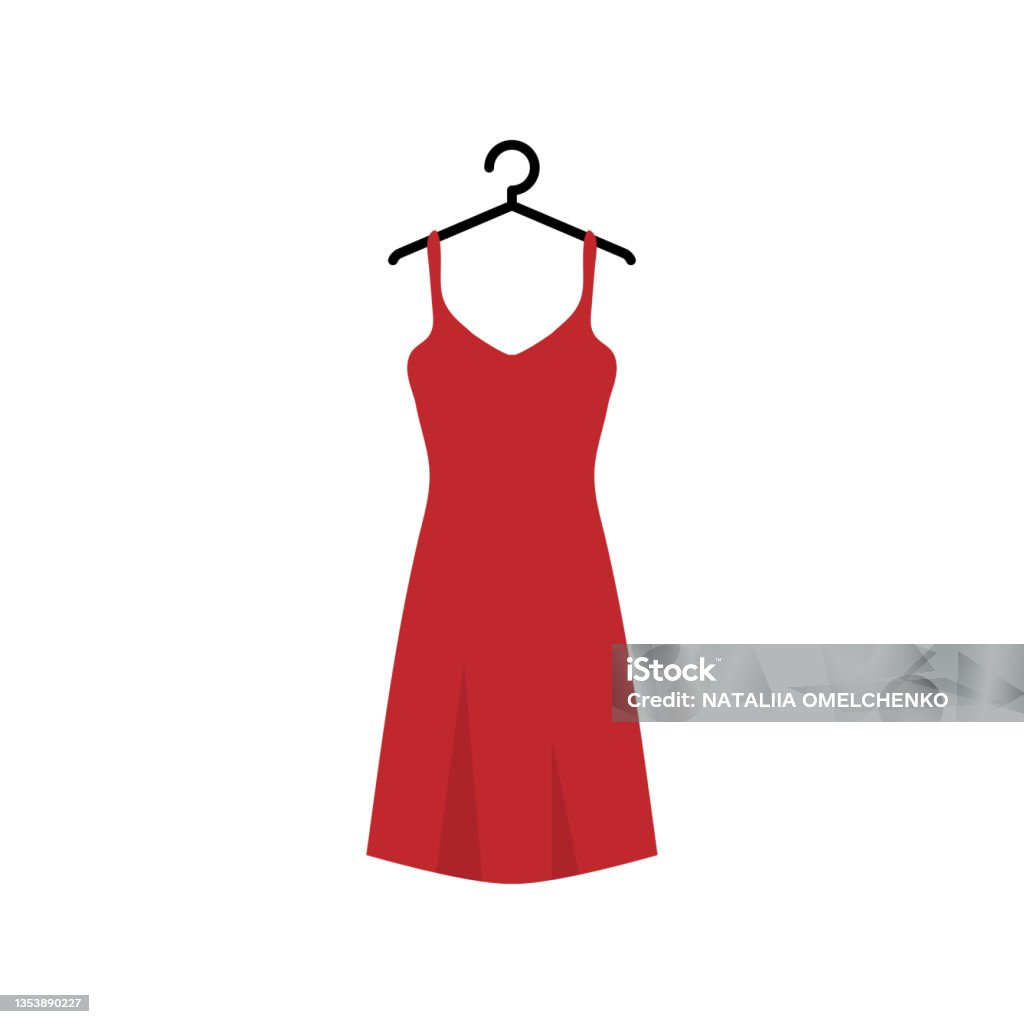


--------------------------------------------------



In [6]:
def search_and_display(query: str, weight_img: float = 0.5, top_k: int = 3):
    print(f"Query: {query}")
    print(f"Weights: Image = {weight_img:.2f}, Text = {1 - weight_img:.2f}\n")
    
    results = rag.search(
        query_text=query,
        weight_img=weight_img,
        top_k=top_k
    )
    
    for i, result in enumerate(results, 1):
        print(f"Result {i}:")
        print(f"Product: {result['description']['name']}")
        print(f"Description: {result['description']['description']}")
        print(f"Overall similarity: {result['similarity']:.4f}")
        print(f"Image similarity: {result['image_similarity']:.4f}")
        print(f"Text similarity: {result['text_similarity']:.4f}")
        display(Image(filename=result['image_path']))
        print("\n" + "-"*50 + "\n")

# Try your own query
search_and_display(
    query="a comfortable cotton shirt in blue color",
    weight_img=0.3,  # Give more weight to text similarity
    top_k=3
)